# Exploratory Data Analysis <br>
From the data provided, this notebook will detail the process of data exploration, with the intentions of generating new hypotheses to test. The 'process' is often subjective to the scientist, but should show a bit of my coding and thought process when looking at a dataset. My goal at the end will be to have a question to answer via 'supervised learning', a machine learning method that contains a target variable of interest that is discretely recorded in the dataset. Most predictive analytics problems and products are supervised learners. <br>
<br>

In [17]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import pandasql 
import numpy as np
from datetime import timedelta

#Figures inline and set visualization style (just so figures are presented in this notebook and not exported)
%matplotlib inline
sns.set()


In [18]:
#load data
raw = pd.read_csv('D://PatientESAS.csv')
raw.sort_values(by = ['patientkey', 'TaskTargetDate'], ascending = True)
raw.head(60)

,patientkey,admissionkey,StartOfCare,DischargeDate,patienttaskkey,ESASName,ESASValue,TaskTargetDate,VisitDate,DischargeType,DischargeStatusDescription,TerminalDiagnosis,ICD10CodeShortDesc,ReferralType,LevelofCare
0,2839565,5567524,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362160127,Anxiety,0,2017-05-01 00:00:00.000,2017-05-01 00:00:00.000,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,Clinic or physician's office,Routine
1,2839565,5567524,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362160127,Depression,0,2017-05-01 00:00:00.000,2017-05-01 00:00:00.000,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,Clinic or physician's office,Routine
2,2839565,5567524,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362160127,Drowsiness,9,2017-05-01 00:00:00.000,2017-05-01 00:00:00.000,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,Clinic or physician's office,Routine
3,2839565,5567524,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362160127,Lack of Appetite,8,2017-05-01 00:00:00.000,2017-05-01 00:00:00.000,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,Clinic or physician's office,Routine
4,2839565,5567524,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362160127,Nausea,0,2017-05-01 00:00:00.000,2017-05-01 00:00:00.000,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,Clinic or physician's office,Routine
5,2839565,5567524,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362160127,Pain,3,2017-05-01 00:00:00.000,2017-05-01 00:00:00.000,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,Clinic or physician's office,Routine
6,2839565,5567524,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362160127,Shortness of Breath,7,2017-05-01 00:00:00.000,2017-05-01 00:00:00.000,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,Clinic or physician's office,Routine
7,2839565,5567524,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362160127,Tiredness,9,2017-05-01 00:00:00.000,2017-05-01 00:00:00.000,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,Clinic or physician's office,Routine
8,2839565,5567524,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362160127,Wellbeing,8,2017-05-01 00:00:00.000,2017-05-01 00:00:00.000,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,Clinic or physician's office,Routine
9,2839565,5567524,2017-05-01 00:00:00.000,2017-07-03 00:00:00.000,362290417,Anxiety,0,2017-05-15 00:00:00.000,2017-05-15 00:00:00.000,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,Clinic or physician's office,Routine


In [19]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3103201 entries, 0 to 3103200
Data columns (total 15 columns):
patientkey                    int64
admissionkey                  int64
StartOfCare                   object
DischargeDate                 object
patienttaskkey                int64
ESASName                      object
ESASValue                     int64
TaskTargetDate                object
VisitDate                     object
DischargeType                 object
DischargeStatusDescription    object
TerminalDiagnosis             object
ICD10CodeShortDesc            object
ReferralType                  object
LevelofCare                   object
dtypes: int64(4), object(11)
memory usage: 355.1+ MB


The file looks to contain 3.1 million rows, with 15 column features. Some of these columns (like patientkey) will be unusable from a modeling perspective, but some feature engineering could be possible (i.e. change in ESAS score since last visit, etc).<br>



In [20]:
#convert object to datetime (that should be)
raw['StartOfCare'] = pd.to_datetime(raw['StartOfCare'], errors = 'coerce')
raw['DischargeDate'] = pd.to_datetime(raw['DischargeDate'], errors = 'coerce')
raw['VisitDate'] = pd.to_datetime(raw['VisitDate'], errors = 'coerce')
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3103201 entries, 0 to 3103200
Data columns (total 15 columns):
patientkey                    int64
admissionkey                  int64
StartOfCare                   datetime64[ns]
DischargeDate                 datetime64[ns]
patienttaskkey                int64
ESASName                      object
ESASValue                     int64
TaskTargetDate                object
VisitDate                     datetime64[ns]
DischargeType                 object
DischargeStatusDescription    object
TerminalDiagnosis             object
ICD10CodeShortDesc            object
ReferralType                  object
LevelofCare                   object
dtypes: datetime64[ns](3), int64(4), object(8)
memory usage: 355.1+ MB


In [21]:
print("Unique patient count: ", raw.patientkey.nunique()) #count unique patients
print("Unique diagnosis count: ",raw.ICD10CodeShortDesc.nunique()) #count unique diagnoses
print("Unique mortality categories: ",raw.DischargeType.unique())

Unique patient count:  27952
Unique diagnosis count:  1371
Unique mortality categories:  ['Death' nan 'Live' 'Revocation']


In [22]:
#convert DischargeType to Binary Mortality flag (1,0)
raw['mortality'] = np.where(raw['DischargeType'] == 'Death', 1,0)

In [23]:
#pivot ESASName with ESASValue column into raw_pivot
raw_pivot = raw.pivot_table(index='patienttaskkey', columns='ESASName', values='ESASValue')
raw_pivot = raw_pivot.fillna(99).astype(int) #convert floats to integers and fill nas with '11'
raw_pivot.columns = [c.replace(' ', '_') for c in raw_pivot.columns] #replace space with _
raw_pivot.head(10)

,Anxiety,Depression,Drowsiness,Lack_of_Appetite,Nausea,Pain,Shortness_of_Breath,Tiredness,Wellbeing
patienttaskkey,,,,,,,,,
357068260,4,4,4,5,1,2,2,4,1
358971624,0,0,0,7,0,0,2,0,2
359380347,0,0,0,2,0,0,2,3,2
359380348,0,0,0,2,0,0,2,3,2
359380349,0,0,0,2,0,0,2,2,2
359380350,0,0,0,2,0,0,2,2,2
359380351,0,0,0,2,0,0,2,2,2
359380352,0,0,0,2,0,0,2,2,2
359380353,0,0,0,2,0,0,2,2,2


In [24]:
raw_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349746 entries, 357068260 to 432410133
Data columns (total 9 columns):
Anxiety                349746 non-null int32
Depression             349746 non-null int32
Drowsiness             349746 non-null int32
Lack_of_Appetite       349746 non-null int32
Nausea                 349746 non-null int32
Pain                   349746 non-null int32
Shortness_of_Breath    349746 non-null int32
Tiredness              349746 non-null int32
Wellbeing              349746 non-null int32
dtypes: int32(9)
memory usage: 14.7 MB


In [25]:
#Joins
q = """Select distinct * from (
    Select x.patientkey
    ,x.admissionkey
    ,x.StartOfCare
    ,x.DischargeDate
    ,x.TaskTargetDate
    ,x.VisitDate
    ,x.DischargeType
    ,x.DischargeStatusDescription
    ,x.TerminalDiagnosis
    ,x.ICD10CodeShortDesc
    ,x.ReferralType
    ,x.LevelofCare
    ,x.mortality
    ,y.*
    from raw as x
    inner join raw_pivot as y
    on x.patienttaskkey = y.patienttaskkey
    ) as tmp
"""
      

In [26]:
df = pandasql.sqldf(q, locals())
df.head(10)


,patientkey,admissionkey,StartOfCare,DischargeDate,TaskTargetDate,VisitDate,DischargeType,DischargeStatusDescription,TerminalDiagnosis,ICD10CodeShortDesc,...,patienttaskkey,Anxiety,Depression,Drowsiness,Lack_of_Appetite,Nausea,Pain,Shortness_of_Breath,Tiredness,Wellbeing
0,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03 00:00:00.000000,2017-05-01 00:00:00.000,2017-05-01 00:00:00.000000,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,...,362160127,0,0,9,8,0,3,7,9,8
1,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03 00:00:00.000000,2017-05-15 00:00:00.000,2017-05-15 00:00:00.000000,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,...,362290417,0,11,8,8,0,0,7,8,8
2,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03 00:00:00.000000,2017-05-29 00:00:00.000,2017-05-29 00:00:00.000000,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,...,362290418,0,11,8,8,0,0,7,9,8
3,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03 00:00:00.000000,2017-06-12 00:00:00.000,2017-06-12 00:00:00.000000,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,...,362290419,0,11,8,8,0,0,7,8,8
4,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03 00:00:00.000000,2017-05-04 00:00:00.000,2017-05-04 00:00:00.000000,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,...,362429188,0,0,0,0,0,0,0,11,11
5,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03 00:00:00.000000,2017-05-08 00:00:00.000,2017-05-08 00:00:00.000000,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,...,362429189,0,0,0,0,0,0,0,0,11
6,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03 00:00:00.000000,2017-05-11 00:00:00.000,2017-05-10 00:00:00.000000,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,...,362429190,0,0,0,11,0,0,0,11,99
7,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03 00:00:00.000000,2017-05-18 00:00:00.000,2017-05-16 00:00:00.000000,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,...,362429191,0,0,0,11,0,0,0,0,11
8,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03 00:00:00.000000,2017-05-25 00:00:00.000,2017-05-25 00:00:00.000000,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,...,362429192,0,99,0,11,0,0,0,11,99
9,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03 00:00:00.000000,2017-05-22 00:00:00.000,2017-05-22 00:00:00.000000,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,...,362429194,0,11,0,11,0,0,0,11,99


In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349779 entries, 0 to 349778
Data columns (total 23 columns):
patientkey                    349779 non-null int64
admissionkey                  349779 non-null int64
StartOfCare                   349779 non-null object
DischargeDate                 189408 non-null object
TaskTargetDate                349779 non-null object
VisitDate                     349779 non-null object
DischargeType                 190206 non-null object
DischargeStatusDescription    190206 non-null object
TerminalDiagnosis             349733 non-null object
ICD10CodeShortDesc            349733 non-null object
ReferralType                  349778 non-null object
LevelofCare                   348963 non-null object
mortality                     349779 non-null int64
patienttaskkey                349779 non-null int64
Anxiety                       349779 non-null int64
Depression                    349779 non-null int64
Drowsiness                    349779 non-null i

In [28]:
#create variable for data cutoff (i.e. DischargeDate - 7 days)
day = pd.DateOffset(days = 7)
df['DischargeDate'] = pd.to_datetime(df['DischargeDate'])
df['VisitDate'] = pd.to_datetime(df['VisitDate'])
df['cutdate'] = df['DischargeDate'].subtract(day)
df.head(100)

,patientkey,admissionkey,StartOfCare,DischargeDate,TaskTargetDate,VisitDate,DischargeType,DischargeStatusDescription,TerminalDiagnosis,ICD10CodeShortDesc,...,Anxiety,Depression,Drowsiness,Lack_of_Appetite,Nausea,Pain,Shortness_of_Breath,Tiredness,Wellbeing,cutdate
0,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03,2017-05-01 00:00:00.000,2017-05-01,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,...,0,0,9,8,0,3,7,9,8,2017-06-26
1,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03,2017-05-15 00:00:00.000,2017-05-15,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,...,0,11,8,8,0,0,7,8,8,2017-06-26
2,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03,2017-05-29 00:00:00.000,2017-05-29,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,...,0,11,8,8,0,0,7,9,8,2017-06-26
3,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03,2017-06-12 00:00:00.000,2017-06-12,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,...,0,11,8,8,0,0,7,8,8,2017-06-26
4,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03,2017-05-04 00:00:00.000,2017-05-04,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,...,0,0,0,0,0,0,0,11,11,2017-06-26
5,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03,2017-05-08 00:00:00.000,2017-05-08,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,...,0,0,0,0,0,0,0,0,11,2017-06-26
6,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03,2017-05-11 00:00:00.000,2017-05-10,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,...,0,0,0,11,0,0,0,11,99,2017-06-26
7,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03,2017-05-18 00:00:00.000,2017-05-16,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,...,0,0,0,11,0,0,0,0,11,2017-06-26
8,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03,2017-05-25 00:00:00.000,2017-05-25,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,...,0,99,0,11,0,0,0,11,99,2017-06-26
9,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03,2017-05-22 00:00:00.000,2017-05-22,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,...,0,11,0,11,0,0,0,11,99,2017-06-26


In [29]:
#create binary flag for mortality == 1 AND VisitDate < cutdate (meaning row doesn't occur with 7 days of mortality)
df['death_within_7_days'] = np.where((df['mortality'] == 1) & (df['VisitDate'] >= df['cutdate']), 1, 0)
df.head(100)

,patientkey,admissionkey,StartOfCare,DischargeDate,TaskTargetDate,VisitDate,DischargeType,DischargeStatusDescription,TerminalDiagnosis,ICD10CodeShortDesc,...,Depression,Drowsiness,Lack_of_Appetite,Nausea,Pain,Shortness_of_Breath,Tiredness,Wellbeing,cutdate,death_within_7_days
0,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03,2017-05-01 00:00:00.000,2017-05-01,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,...,0,9,8,0,3,7,9,8,2017-06-26,0
1,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03,2017-05-15 00:00:00.000,2017-05-15,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,...,11,8,8,0,0,7,8,8,2017-06-26,0
2,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03,2017-05-29 00:00:00.000,2017-05-29,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,...,11,8,8,0,0,7,9,8,2017-06-26,0
3,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03,2017-06-12 00:00:00.000,2017-06-12,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,...,11,8,8,0,0,7,8,8,2017-06-26,0
4,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03,2017-05-04 00:00:00.000,2017-05-04,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,...,0,0,0,0,0,0,11,11,2017-06-26,0
5,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03,2017-05-08 00:00:00.000,2017-05-08,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,...,0,0,0,0,0,0,0,11,2017-06-26,0
6,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03,2017-05-11 00:00:00.000,2017-05-10,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,...,0,0,11,0,0,0,11,99,2017-06-26,0
7,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03,2017-05-18 00:00:00.000,2017-05-16,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,...,0,0,11,0,0,0,0,11,2017-06-26,0
8,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03,2017-05-25 00:00:00.000,2017-05-25,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,...,99,0,11,0,0,0,11,99,2017-06-26,0
9,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03,2017-05-22 00:00:00.000,2017-05-22,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,...,11,0,11,0,0,0,11,99,2017-06-26,0


In [30]:
#store df as a smaller dataframe for quicker analysis prior to exploding discharge diagnosis
%store df

Stored 'df' (DataFrame)


## Visualizations

simple exploratory visualizations to better understand data.

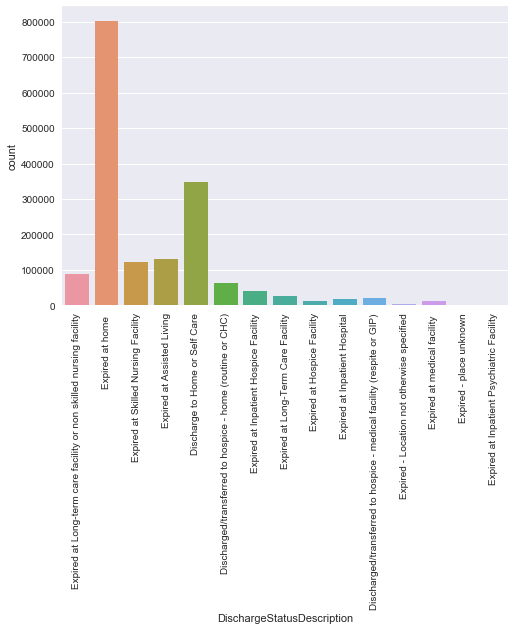

In [14]:
bar = sns.countplot(x = 'DischargeStatusDescription', data = raw)
bar.set_xticklabels(bar.get_xticklabels(), rotation=90)
#each count represents a Row, not necessarily counts of people

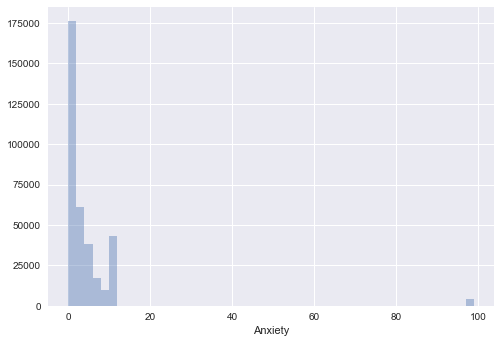

In [15]:
#ploting distributions of ESAS values
sns.distplot(raw_pivot.Anxiety, kde = False)

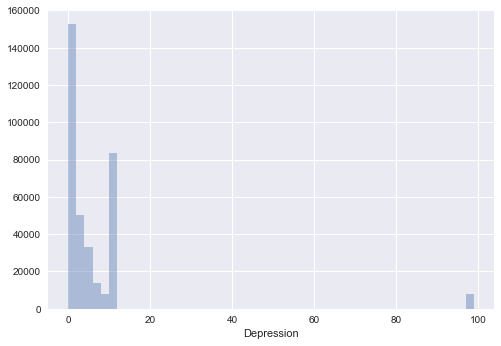

In [16]:
sns.distplot(raw_pivot.Depression, kde = False)

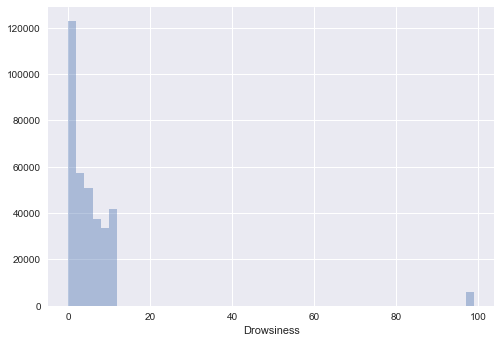

In [17]:
sns.distplot(raw_pivot.Drowsiness, kde = False)

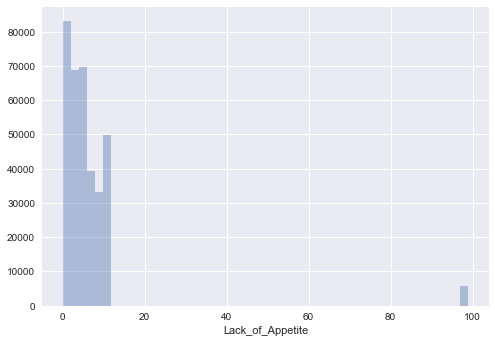

In [18]:
sns.distplot(raw_pivot.Lack_of_Appetite, kde = False)

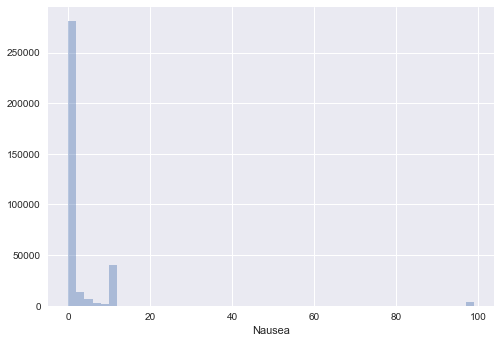

In [19]:
sns.distplot(raw_pivot.Nausea, kde = False)

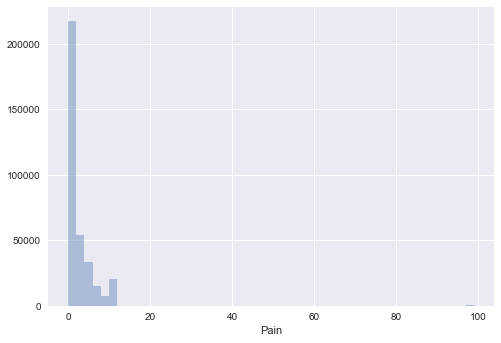

In [20]:
sns.distplot(raw_pivot.Pain, kde = False)

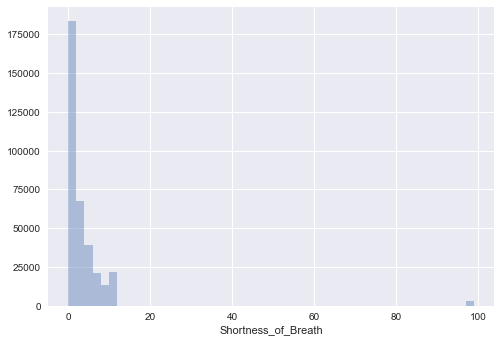

In [21]:
sns.distplot(raw_pivot.Shortness_of_Breath, kde = False)

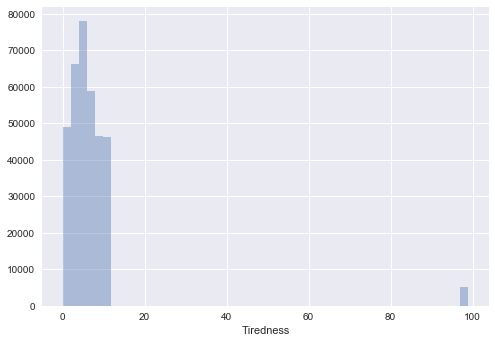

In [22]:
sns.distplot(raw_pivot.Tiredness, kde = False)

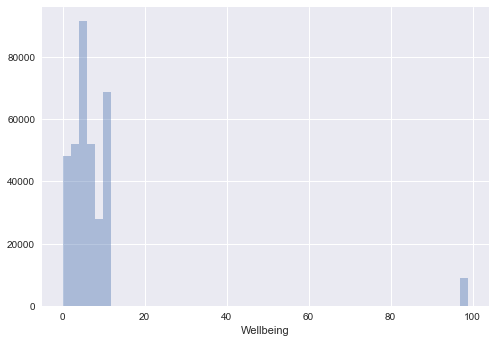

In [23]:
sns.distplot(raw_pivot.Wellbeing, kde = False)

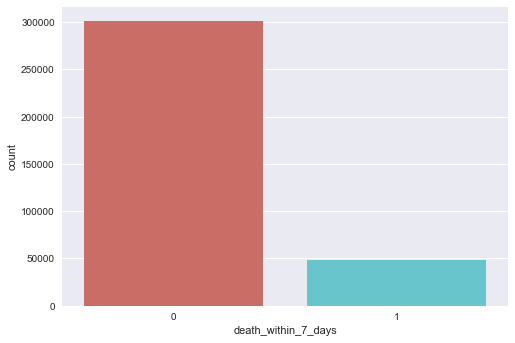

In [24]:
sns.countplot(x='death_within_7_days',data=df, palette='hls')

# Data Cleaning and Feature Engineering


Alright, I have a feel for the data and some ideas for hypotheses or goals. I think given the data, I can build a risk model for mortality within a different time frame. For instance, given the inputs, what's the risk of a person passing away in the next 4 weeks? I could see some value to this, as maybe a high risk score would lend itself to more elevated levels of care (e.g. Hospice care). Time frame would be somewhat flexible....<br>
<br>
To do this, I need to create a time-series approach for training the model, which a logistic regression should work great. Alternatively, a survival analysis could be conducted, too, to find which factors influence the outcome (mortality within 4 weeks). Addtionally, a binary predictor of death could be determined from support vector machine, CART, random forest... lots of options to try. Boosted decision tree may be serious contender.

The outputs of this model would be a risk score, likely the logit of the regression function, and that would be collapsed into categories representing significant risk, moderate risk, and low risk. <br>
<br>
Training model: Dataframe will need to include people who have and haven't passed away. Anchoring date could be D/C date, but I'm not sure right now what to do if there is no D/C date... Assume they are still alive? Fitting the model will be done with all data WITHOUT a person's most recent 4 weeks data. Again, the anchoring date is important here, and thus, training data will need to include everyone with the discrete anchoring date, as this will serve as the data cutoff point for training/testing purposes.



#### TODO List:
- create featurized dataframe
- collapse all mortality-related discharge descriptors into a mortality flag (1,0)
- convert objects to datetime (when appropriate)
- determine cutpoint and anchor


In [31]:
#dummify ICD10CodeShortDesc (going to blow up... 1300+ columns)
dummy = pd.get_dummies(df['ICD10CodeShortDesc'], drop_first=True) #one-hot encoding so drop 1st column
#concat dummy into df
df_merge = pd.concat([df, dummy], axis = 1)
df_merge.head(10)

,patientkey,admissionkey,StartOfCare,DischargeDate,TaskTargetDate,VisitDate,DischargeType,DischargeStatusDescription,TerminalDiagnosis,ICD10CodeShortDesc,...,Venous insufficiency (chronic) (peripheral),Ventricular septal defect,Ventricular tachycardia,"Vesical fistula, not elsewhere classified","Viral pneumonia, unspecified",Volunteer activity,Waldenstrom macroglobulinemia,Wernicke's encephalopathy,"X-linked adrenoleukodystrophy, unspecified type",Zoster encephalitis
0,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03,2017-05-01 00:00:00.000,2017-05-01,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,...,0,0,0,0,0,0,0,0,0,0
1,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03,2017-05-15 00:00:00.000,2017-05-15,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,...,0,0,0,0,0,0,0,0,0,0
2,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03,2017-05-29 00:00:00.000,2017-05-29,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,...,0,0,0,0,0,0,0,0,0,0
3,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03,2017-06-12 00:00:00.000,2017-06-12,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,...,0,0,0,0,0,0,0,0,0,0
4,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03,2017-05-04 00:00:00.000,2017-05-04,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,...,0,0,0,0,0,0,0,0,0,0
5,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03,2017-05-08 00:00:00.000,2017-05-08,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,...,0,0,0,0,0,0,0,0,0,0
6,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03,2017-05-11 00:00:00.000,2017-05-10,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,...,0,0,0,0,0,0,0,0,0,0
7,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03,2017-05-18 00:00:00.000,2017-05-16,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,...,0,0,0,0,0,0,0,0,0,0
8,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03,2017-05-25 00:00:00.000,2017-05-25,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,...,0,0,0,0,0,0,0,0,0,0
9,2839565,5567524,2017-05-01 00:00:00.000000,2017-07-03,2017-05-22 00:00:00.000,2017-05-22,Death,Expired at Long-term care facility or non skil...,G20,Parkinson's disease,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349779 entries, 0 to 349778
Columns: 1395 entries, patientkey to Zoster encephalitis
dtypes: datetime64[ns](3), int32(1), int64(13), object(8), uint8(1370)
memory usage: 522.4+ MB


Alright, so there may be some dimensionality issues with a regression at this point. I'm looking ~1400 variables, with approximately 20,000 people pre-slicing. That should be okay, but for long-term performance of a model, likely need to look into some feature reduction methods...



#### Order and slicing data for training
If goal is to build a model predictive of mortality within 7 days, I need to produce an output/training feature that represents death within next 7 days. Maybe need to move this higher in code before expanding out Dx column, but the gist of the work is convert datetime columns to actual dates and times, order by person, visit date, and discharge date, then compute a binary outcome for each row that looks at whether the person has a mortality event AND the discharge date is within 7 days of visit date. 

In [33]:
#order dataframe by patientkey, VisitDate, DischargeDate
df_merge = df_merge.sort_values(['patientkey', 'VisitDate', 'DischargeDate', 'cutdate'], ascending = True)
%store df_merge
df_merge.head(100)

Stored 'df_merge' (DataFrame)


,patientkey,admissionkey,StartOfCare,DischargeDate,TaskTargetDate,VisitDate,DischargeType,DischargeStatusDescription,TerminalDiagnosis,ICD10CodeShortDesc,...,Venous insufficiency (chronic) (peripheral),Ventricular septal defect,Ventricular tachycardia,"Vesical fistula, not elsewhere classified","Viral pneumonia, unspecified",Volunteer activity,Waldenstrom macroglobulinemia,Wernicke's encephalopathy,"X-linked adrenoleukodystrophy, unspecified type",Zoster encephalitis
152342,1605720,5915383,2017-08-02 00:00:00.000000,NaT,2017-08-02 00:00:00.000,2017-08-02,None,None,G35,Multiple sclerosis,...,0,0,0,0,0,0,0,0,0,0
152343,1605720,5915383,2017-08-02 00:00:00.000000,NaT,2017-08-07 00:00:00.000,2017-08-07,None,None,G35,Multiple sclerosis,...,0,0,0,0,0,0,0,0,0,0
152344,1605720,5915383,2017-08-02 00:00:00.000000,NaT,2017-08-09 00:00:00.000,2017-08-09,None,None,G35,Multiple sclerosis,...,0,0,0,0,0,0,0,0,0,0
152345,1605720,5915383,2017-08-02 00:00:00.000000,NaT,2017-08-14 00:00:00.000,2017-08-14,None,None,G35,Multiple sclerosis,...,0,0,0,0,0,0,0,0,0,0
152349,1605720,5915383,2017-08-02 00:00:00.000000,NaT,2017-08-19 00:00:00.000,2017-08-19,None,None,G35,Multiple sclerosis,...,0,0,0,0,0,0,0,0,0,0
152346,1605720,5915383,2017-08-02 00:00:00.000000,NaT,2017-08-21 00:00:00.000,2017-08-21,None,None,G35,Multiple sclerosis,...,0,0,0,0,0,0,0,0,0,0
152350,1605720,5915383,2017-08-02 00:00:00.000000,NaT,2017-08-24 00:00:00.000,2017-08-24,None,None,G35,Multiple sclerosis,...,0,0,0,0,0,0,0,0,0,0
152357,1605720,5915383,2017-08-02 00:00:00.000000,NaT,2017-08-29 00:00:00.000,2017-08-29,None,None,G35,Multiple sclerosis,...,0,0,0,0,0,0,0,0,0,0
152351,1605720,5915383,2017-08-02 00:00:00.000000,NaT,2017-08-30 00:00:00.000,2017-08-30,None,None,G35,Multiple sclerosis,...,0,0,0,0,0,0,0,0,0,0
152352,1605720,5915383,2017-08-02 00:00:00.000000,NaT,2017-09-06 00:00:00.000,2017-09-06,None,None,G35,Multiple sclerosis,...,0,0,0,0,0,0,0,0,0,0


Okay, so at this point I have a dataframe that has categorical variables expanded, a marker for death, and my outcome of real interest: Death within in the next 7 days, which I'll use as the slicing variable while iterating over each row. If that variable has 0, keep for training. If 1, drop? Or keep for training purposes?

In [36]:
#counts of outcome variable
df_merge.groupby('death_within_7_days').size()


death_within_7_days
0    301165
1     48614
dtype: int64

At this point, I feel like the data is structure perfectly for a few different models. The next notebook will take the outputs of the dataframes for model building (logistic_regress_random_forest notebook)